In [1]:
import glob
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sea_ice_model import * 
from mpl_toolkits.mplot3d import Axes3D

C:\Users\user\AppData\Local\Temp/ipykernel_20476/1907016745.py:24: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
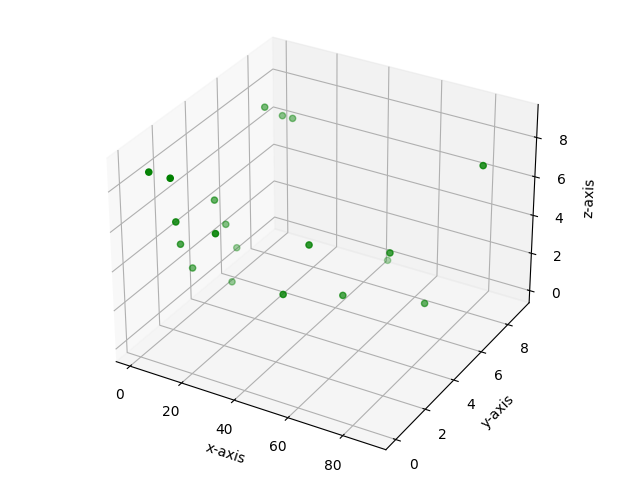

In [2]:
# creating 3d plot using matplotlib
# in python

# for creating a responsive plot
%matplotlib widget

# importing required libraries
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
auto_add_to_figure=False
# creating random dataset
xs = [14, 24, 43, 47, 54, 66, 74, 89, 12,
	44, 1, 2, 3, 4, 5, 9, 8, 7, 6, 5]

ys = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 6, 3,
	5, 2, 4, 1, 8, 7, 0, 5]

zs = [9, 6, 3, 5, 2, 4, 1, 8, 7, 0, 1, 2,
	3, 4, 5, 6, 7, 8, 9, 0]

# creating figure
fig = plt.figure()

ax = Axes3D(fig)
fig.add_axes(ax)
# creating the plot
plot_geeks = ax.scatter(xs, ys, zs, color='green')

# setting title and labels
ax.set_title("3D plot")
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_zlabel('z-axis')

# displaying the plot
plt.show()


In [2]:
import matplotlib

In [55]:
def delete_incomplete(dataframe,divisor=2.4):
    for i,index in enumerate(dataframe.columns):
    #   跳过第一天和最后一天
        
        if i == 0 or i == (dataframe.shape[1]-1):
            continue
        day_count = dataframe[index].sum()
        front_day_count = dataframe[dataframe.columns[i-1]].sum()
        next_day_count =  dataframe[dataframe.columns[i+1]].sum()
        if day_count <( (front_day_count + next_day_count)/divisor):
            dataframe[index]=0

def get_hist_data_from_csv(csv_files_list,feature,ice_type_list=[1,2,3,4,5]):
    dataframe = get_data_from_csv(csv_files_list)
    dataframe['ice_type'] = dataframe['ice_type'].astype(str)
#     dataframe = dataframe[dataframe['ice_type'].isin(ice_type_list) ]
    dataframe['time'] = pd.to_datetime(dataframe['time'], errors='coerce')
    dataframe['polor_ratio'] = dataframe.apply(lambda r: ((r['sig0_VV'] - r['sig0_HH']) / (r['sig0_VV'] + r['sig0_HH'])), axis=1)
    dataframe['polor_ratio_2'] = dataframe.apply(lambda r: (r['sig0_VV'] / r['sig0_HH']), axis=1)
    
    return dataframe[['time',feature]]



def plot_hist_time_series(hist_df, year, save_path=None,title_add = ' '):
    plt.figure(figsize=(10,6)) 
    if year == '2019':
        xlabel = 'Winter(2019-2020)'
        plt.xticks([13,41,72,103,132,163],[ '2019-11', '2019-12', '2020-01', '2020-02', '2020-03',
           '2020-04'])
    elif year == '2020':
        xlabel = 'Winter(2020-2021)'
        plt.xticks([19,43,63,83,111,141],['2020-11', '2020-12', '2021-01', '2021-02', '2021-03',
       '2021-04'])
    else:
        print('请输入正确年份！')
        
    plt.yticks([0,100,200,300,399],[-25,-20,-15,-10,-5])
    plt.pcolormesh(hist_df,cmap=plt.cm.jet)
    cb = plt.colorbar(location='top')
    tick_locator = ticker.MaxNLocator(nbins=2)
    cb.locator = tick_locator
    cb.set_ticks([0.1, hist_df.max().max()])
    cb.set_ticklabels(['Min',  'Max'])

    
    plt.xlabel('Winter( '+year+'- '+str(int(year)+1)+')')
    plt.ylabel('Backscatter Coefficient(σ0 ) ')
    plt.title('Daily time series of histograms '+year+'-winter '+VV_HH +' '+ title_add)
    plt.savefig(save_path)
    print('file save in ' + save_path)

def plot_hist_time_series_polor_ratio(hist_df, year, save_path=None,title_add = ' '):
    plt.figure(figsize=(10,6)) 
    if year == '2019':
        xlabel = 'Winter(2019-2020)'
        plt.xticks([13,41,72,103,132,163],[ '2019-11', '2019-12', '2020-01', '2020-02', '2020-03',
           '2020-04'])
    elif year == '2020':
        xlabel = 'Winter(2020-2021)'
        plt.xticks([19,43,63,83,111,141],['2020-11', '2020-12', '2021-01', '2021-02', '2021-03',
       '2021-04'])
    else:
        print('请输入正确年份！')

    plt.yticks([0,100,200,300,399],[-0.15,-0.075,0,0.075,0.15])
    plt.pcolormesh(hist_df,cmap=plt.cm.jet)
    cb = plt.colorbar(location='bottom')
    
    tick_locator = ticker.MaxNLocator(nbins=2)
    cb.locator = tick_locator
    cb.set_ticks([0, hist_df.max().max()])
    cb.set_ticklabels(['Min',  'Max'])
    plt.xlabel('Winter( '+year+'- '+str(int(year)+1)+')')
    plt.ylabel('Polarization Ratio ')
    plt.title('Daily time series of histograms '+year+'-winter '+VV_HH +' '+ title_add)
    plt.savefig(save_path)
    print('file save in ' + save_path)
    
def plot_hist_time_series_polor_ratio_2(hist_df, year, save_path=None,title_add = None):
    plt.figure(figsize=(10,6)) 
    if year == '2019':
        xlabel = 'Winter(2019-2020)'
        plt.xticks([13,41,72,103,132,163],[ '2019-11', '2019-12', '2020-01', '2020-02', '2020-03',
           '2020-04'])
    elif year == '2020':
        xlabel = 'Winter(2020-2021)'
        plt.xticks([19,43,63,83,111,141],['2020-11', '2020-12', '2021-01', '2021-02', '2021-03',
       '2021-04'])
    else:
        print('请输入正确年份！')

    plt.yticks([0,100,200,300,399],[0.5,0.75,1,1.25,1.5])
    plt.pcolormesh(hist_df,cmap=plt.cm.jet)
    cb = plt.colorbar(location='bottom')
    tick_locator = ticker.MaxNLocator(nbins=2)
    cb.locator = tick_locator
    cb.set_ticks([0, hist_df.max().max()])
    cb.set_ticklabels(['Min',  'Max'])
    plt.xlabel('Winter( '+year+'- '+str(int(year)+1)+')')
    plt.ylabel('Polarization Ratio ')
    plt.title('Daily time series of histograms '+year+'-winter '+VV_HH +' '+ title_add)
    plt.savefig(save_path)
    print('file save in ' + save_path)
        

In [4]:
VV_del_day =       ['2019-05-14', '2019-05-15', '2019-05-16', '2019-05-17', '2019-05-18', '2019-05-19',
       '2019-05-20', '2019-05-21', '2019-05-22', '2019-05-23', '2019-05-24', '2019-05-25',
       '2019-05-26', '2019-05-27', '2019-05-28', '2019-11-02', '2019-11-09', '2019-11-16',
       '2019-11-30', '2019-12-07', '2019-12-14', '2019-12-22', '2019-12-30', '2020-01-25',
       '2020-01-27', '2020-02-12', '2020-02-15', '2020-03-29', '2020-10-25', '2020-10-31',
       '2020-11-07', '2020-11-15', '2020-11-22', '2021-03-15', '2021-03-31', '2021-04-11']

HH_del_day =     ['2019-05-14', '2019-05-15', '2019-05-16', '2019-05-17', '2019-05-18', '2019-05-19',
       '2019-05-20', '2019-05-21', '2019-05-22', '2019-05-23', '2019-05-24', '2019-05-25',
       '2019-05-26', '2019-05-27', '2019-05-28', '2019-11-02', '2019-11-09', '2019-11-16',
       '2019-11-30', '2019-12-07', '2019-12-14', '2019-12-22', '2019-12-30', '2020-01-25',
       '2020-01-26', '2020-01-27', '2020-02-12', '2020-02-15', '2020-02-17', '2020-03-08',
       '2020-03-29', '2020-10-18', '2020-10-25', '2020-10-31', '2020-11-07', '2020-11-15',
       '2020-11-22', '2020-12-06', '2020-12-20', '2020-12-21', '2021-03-15', '2021-03-31',
       '2021-04-11']

In [6]:
VV_HH = 'VV'
csv_dir = r'E:\python_workfile\sea_ice_classification\training6\csv\polarization_ratio_use_for_statistic'
csv_files = glob.glob(csv_dir + '\*.csv')


bins =  np.arange(-25,-5,0.05)
polor_ratio_bins = np.arange(-0.15,0.15,0.00075)
polor_ratio_2_bins = np.arange(0.5,1.5,0.0025)


f = lambda x: pd.Series(np.histogram(x, bins=bins)[0], index=bins[:-1])

polor_hist_f = lambda x: pd.Series(np.histogram(x, bins=polor_ratio_bins)[0], index=bins[:-1])

polor_hist_2_f = lambda x: pd.Series(np.histogram(x, bins=polor_ratio_2_bins)[0], index=bins[:-1])
hist_save_path = r'E:\python_workfile\sea_ice_classification\training6\hist\time_sequence'

polorization_ratio_hist_save_path = r'D:\python_workfile\sea_ice_classification\training6\hist\time_sequence\polorization_ratio_2'



In [7]:
classes = ['nials', 'young ice', 'first year ice', 'old ice', 'fast ice']

In [8]:
if VV_HH == 'VV':
    del_day = VV_del_day
else:
    del_day = HH_del_day

In [9]:
year_list = ['2019','2020']
csv_files_list = [csv_files[20:195],csv_files[-155:]]

2019
file save in D:\python_workfile\sea_ice_classification\training6\hist\time_sequence\polorization_ratio_2\Daily time series of histograms 2019-winter VVnials
2020
file save in D:\python_workfile\sea_ice_classification\training6\hist\time_sequence\polorization_ratio_2\Daily time series of histograms 2020-winter VVnials
2019
file save in D:\python_workfile\sea_ice_classification\training6\hist\time_sequence\polorization_ratio_2\Daily time series of histograms 2019-winter VVyoung ice
2020
file save in D:\python_workfile\sea_ice_classification\training6\hist\time_sequence\polorization_ratio_2\Daily time series of histograms 2020-winter VVyoung ice
2019
file save in D:\python_workfile\sea_ice_classification\training6\hist\time_sequence\polorization_ratio_2\Daily time series of histograms 2019-winter VVfirst year ice
2020
file save in D:\python_workfile\sea_ice_classification\training6\hist\time_sequence\polorization_ratio_2\Daily time series of histograms 2020-winter VVfirst year ice
20

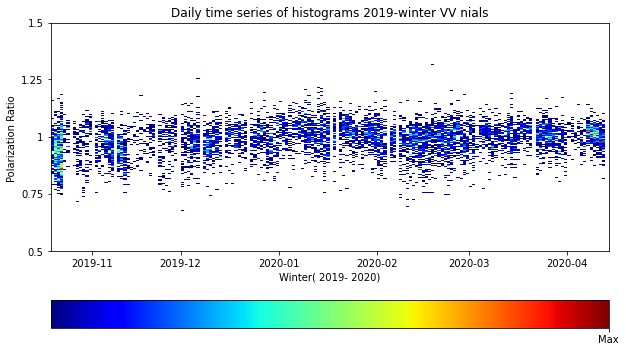

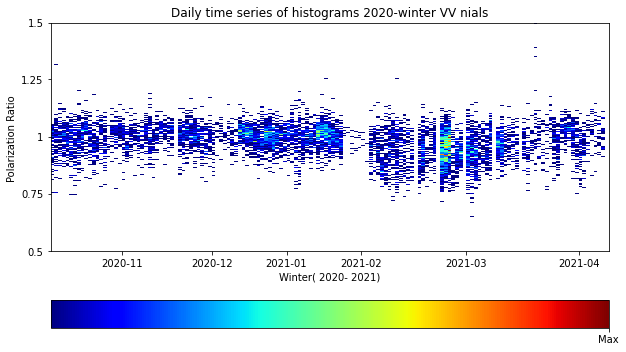

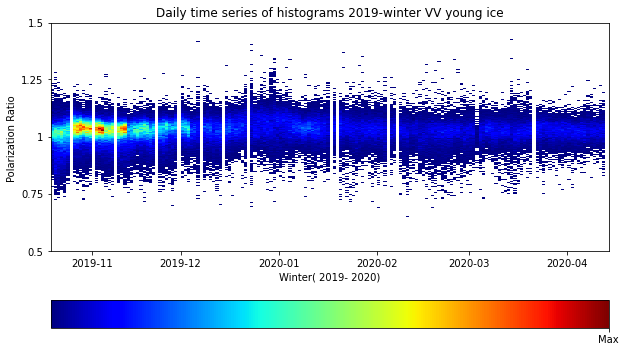

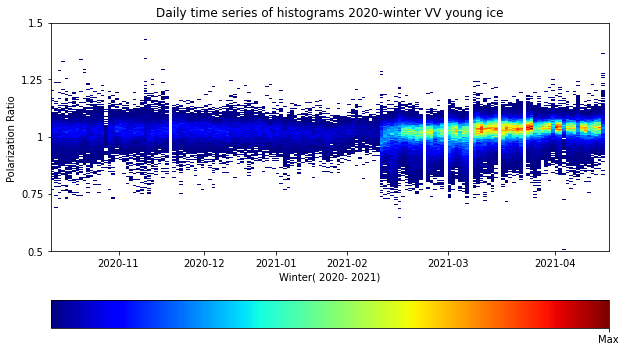

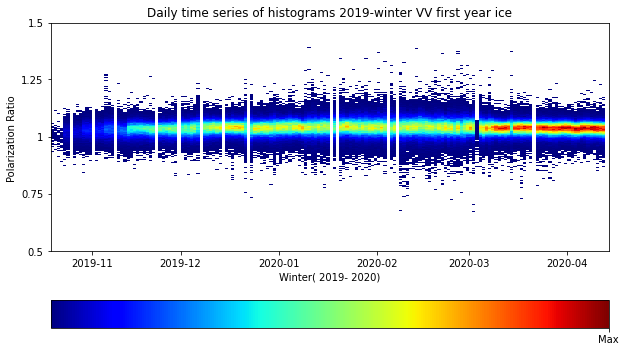

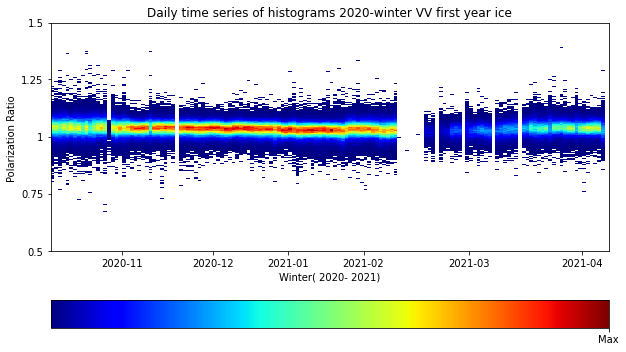

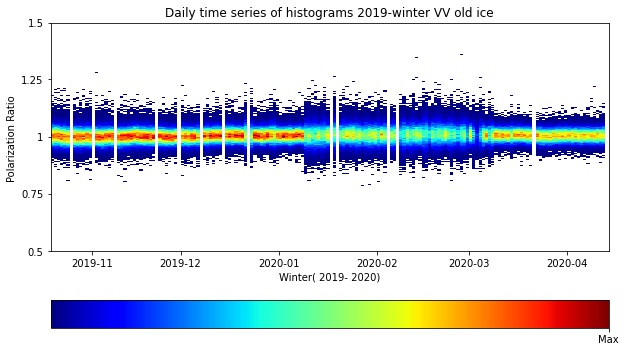

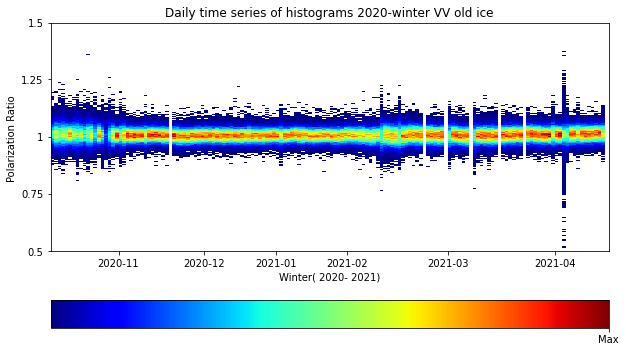

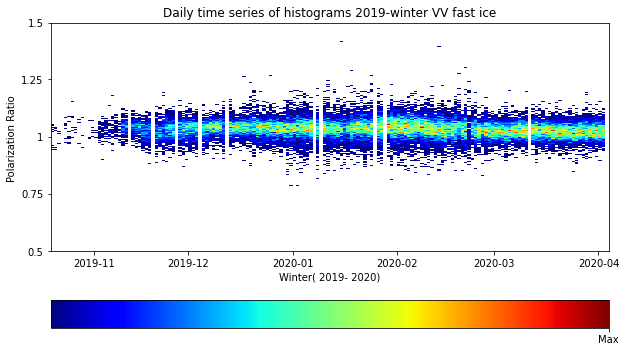

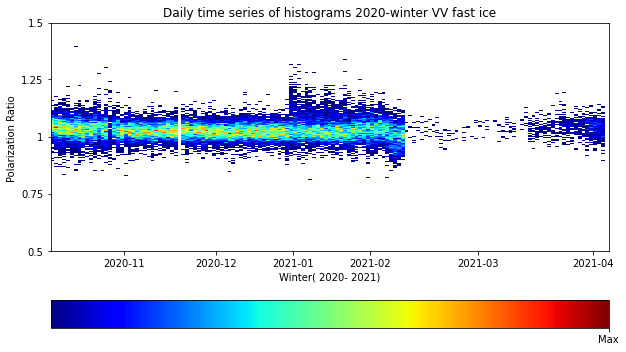

In [26]:
for ice_index in range(1,6):

    for year, csv_files in zip(year_list, csv_files_list):

        hist_data = get_hist_data_from_csv(csv_files,feature = 'polor_ratio_2',ice_type_list = [str(ice_index)])

        sea_ice_daily = hist_data.groupby(['time'])

        hist_df = sea_ice_daily.apply(polor_hist_2_f).T

        hist_df[del_day] = 0
        hist_df[hist_df==0] = np.nan
        title_add= classes[ice_index-1]
        name = 'Daily time series of histograms '+str(year)+'-winter '+VV_HH
        print(year)
        plot_hist_time_series_polor_ratio_2(hist_df, year, save_path =polorization_ratio_hist_save_path + '\\' + name +title_add ,title_add =title_add)

2019
file save in E:\python_workfile\sea_ice_classification\training6\hist\time_sequence\Daily time series of histograms 2019-winter VV
2020
file save in E:\python_workfile\sea_ice_classification\training6\hist\time_sequence\Daily time series of histograms 2020-winter VV


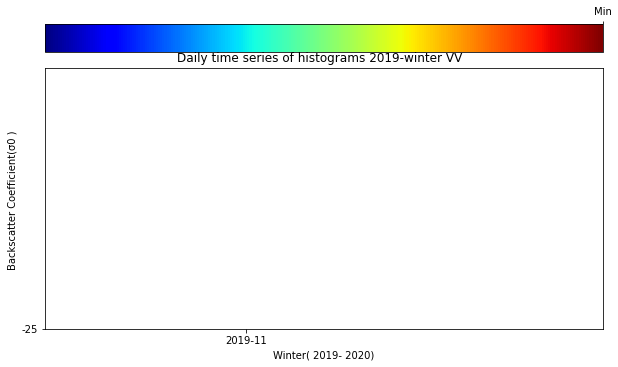

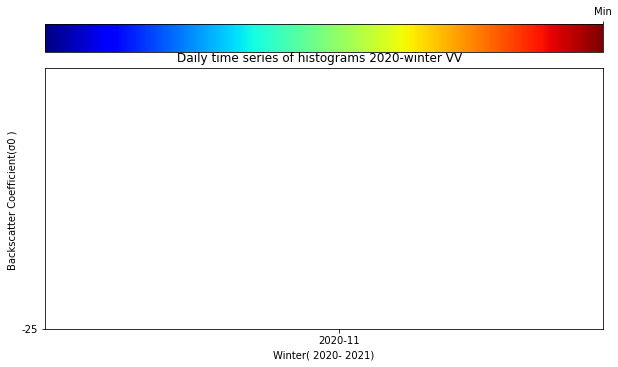

In [19]:
for year, csv_files in zip(year_list, csv_files_list):

        hist_data = get_hist_data_from_csv(csv_files,feature = 'polor_ratio_2',ice_type_list = [str(ice_index)])

        sea_ice_daily = hist_data.groupby(['time'])

        hist_df = sea_ice_daily.apply(polor_hist_2_f).T

        hist_df[del_day] = 0
        hist_df[hist_df==0] = np.nan
        title_add= classes[ice_index-1]
        name = 'Daily time series of histograms '+str(year)+'-winter '+VV_HH
        print(year)
        plot_hist_time_series_polor_ratio_2(hist_df, year, save_path =polorization_ratio_hist_save_path + '\\' + name +title_add ,title_add =title_add)

In [32]:
csv_files

['E:\\python_workfile\\sea_ice_classification\\training6\\csv\\polarization_ratio_use_for_statistic\\20191014.csv',
 'E:\\python_workfile\\sea_ice_classification\\training6\\csv\\polarization_ratio_use_for_statistic\\20191015.csv',
 'E:\\python_workfile\\sea_ice_classification\\training6\\csv\\polarization_ratio_use_for_statistic\\20191022.csv',
 'E:\\python_workfile\\sea_ice_classification\\training6\\csv\\polarization_ratio_use_for_statistic\\20191023.csv',
 'E:\\python_workfile\\sea_ice_classification\\training6\\csv\\polarization_ratio_use_for_statistic\\20191024.csv',
 'E:\\python_workfile\\sea_ice_classification\\training6\\csv\\polarization_ratio_use_for_statistic\\20191025.csv',
 'E:\\python_workfile\\sea_ice_classification\\training6\\csv\\polarization_ratio_use_for_statistic\\20191026.csv',
 'E:\\python_workfile\\sea_ice_classification\\training6\\csv\\polarization_ratio_use_for_statistic\\20191027.csv',
 'E:\\python_workfile\\sea_ice_classification\\training6\\csv\\polarizat

In [49]:
ice_index = 1

In [53]:
year, csv_files = year_list[0], csv_files_list[0]

In [56]:
hist_data = get_hist_data_from_csv(csv_files,feature = 'sig0_VV')

In [59]:
sea_ice_daily = hist_data.groupby(['time'])

In [44]:
polor_ratio_2_bins = np.arange(0.5,1.5,0.0025)

polor_hist_2_f = lambda x: pd.Series(np.histogram(x, bins=polor_ratio_2_bins)[0], index=bins[:-1])

In [60]:
hist_df = sea_ice_daily.apply(f).T

In [62]:
hist_df = sea_ice_daily.apply(polor_hist_f).T

hist_df[del_day] = 0
hist_df[hist_df==0] = np.nan
# title_add= classes[ice_index-1]

In [63]:
name = 'Daily time series of histograms '+str(year)+'-winter '+VV_HH


file save in Daily time series of histograms 2019-winter VV


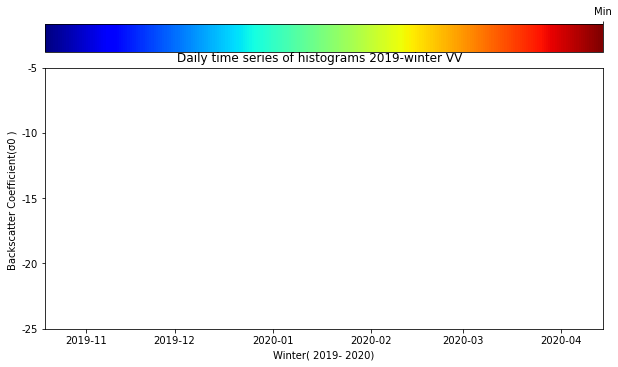

In [64]:
plot_hist_time_series(hist_df, year, save_path =name  )

# 绘制各冰型计划比联合直方图（monthly）

In [136]:
def hy_file_month_split(files):
    '''
    :files 文件列表
    :returns 逐月分的csv文件列表
    '''
    files.sort()
    file_list = []
    list = []
    for i in range(len(files)):

        if i == 0:
            list.append(files[i])
            continue

        if (files[i].split('\\')[-1][:6]) == (
        files[i - 1].split('\\')[-1][:6]):
            list.append(files[i])
        else:
            file_list.append(list)
            list = []
            list.append(files[i])
    file_list.append(list)
    return file_list

In [63]:
save_path = r'D:\python_workfile\sea_ice_classification\training6\hist\monthly_hist'

In [140]:
monthly_files = hy_file_month_split(csv_files)


In [83]:
fig = plt.figure(figsize=(12,10))

month = monthly_file[0].split('\\')[-1][:6]
data = get_data_from_csv(monthly_file)

data['ice_type'] = data['ice_type'].astype(str)

data = data[data['ice_type'].isin([str(ice_index+1)]) ]


<Figure size 864x720 with 0 Axes>

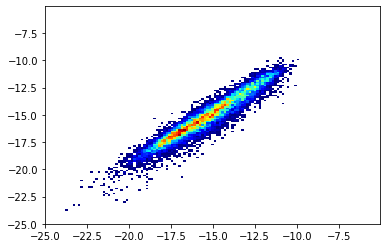

In [102]:
# 画图
hist2d = plt.hist2d(x=data['sig0_VV'], y=data['sig0_HH'], bins=np.arange(-25,-5,0.15),cmin=0.00001,density=True,cmap=plt.cm.jet)
# hist2d = plt.hist2d(x=data['sig0_VV'], y=data['sig0_HH'], bins=np.arange(-25,-5,0.15),density=True,cmap=plt.cm.jet)

In [104]:
hist2d[0][hist2d[0] == np.nan]=0

In [109]:
np.nan_to_num(hist2d[0]).max()

0.16358737490377523

In [106]:
hist2d[0].max()

nan

In [96]:
len(np.where(hist2d[0]!=np.nan)[1])

17689

In [ ]:

cb = plt.colorbar(location='right')
tick_locator = ticker.MaxNLocator(nbins=2)
cb.locator = tick_locator
cb.set_ticks([0.00001, hist2d[0].max()])
cb.set_ticklabels(['Min',  'Max'])
cb.set_label('Normalized Height')

plt.xlabel('VV Sigma0')
plt.ylabel('HH Sigma0')
plt.title(f' {classes[ice_index]}  {month} Sigma0')
# 画对角线
x = np.linspace(-25,-5,100)
y=x
plt.plot(x,y,'-r')

plt.savefig(save_path + f'\\{ice_type} {month}.png')
print(month)

# 逐张画图

201905
201905
201905
201905
201905


ParserError: Error tokenizing data. C error: Calling read(nbytes) on source failed. Try engine='python'.

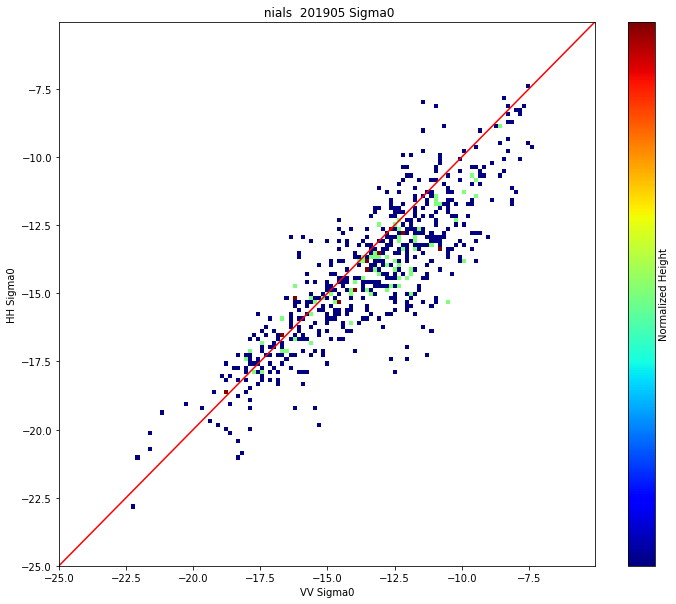

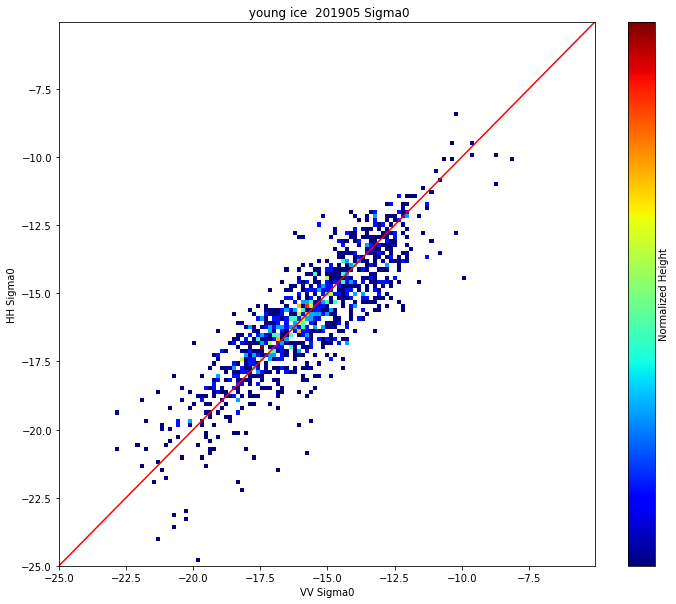

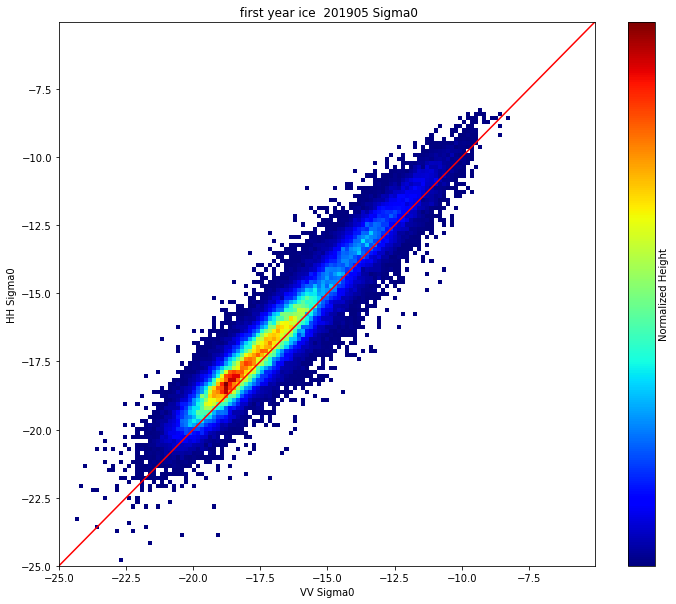

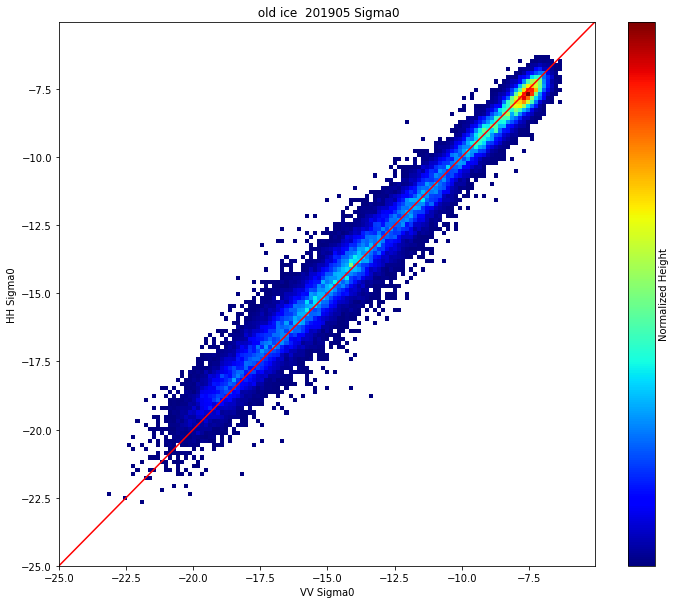

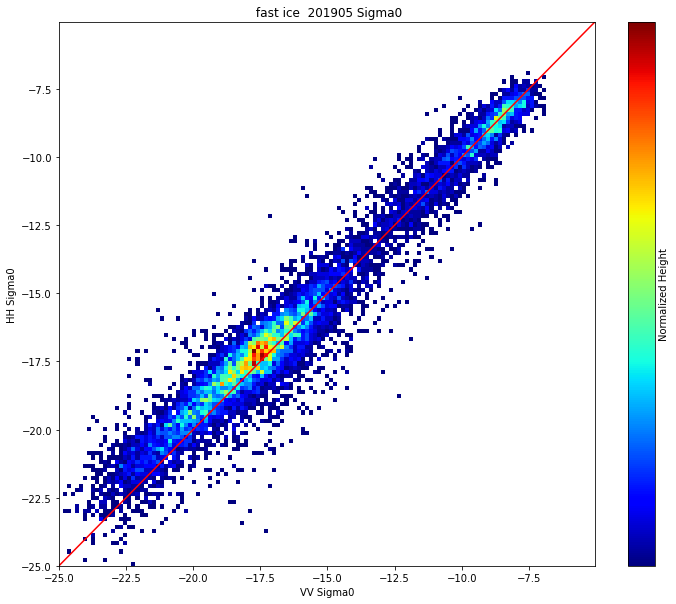

<Figure size 864x720 with 0 Axes>

In [163]:
for monthly_file in monthly_files[:]:
    for ice_index,ice_type in enumerate(classes):
        fig = plt.figure(figsize=(12,10))

        month = monthly_file[0].split('\\')[-1][:6]
        data = get_data_from_csv(monthly_file)

        data['ice_type'] = data['ice_type'].astype(str)

        data = data[data['ice_type'].isin([str(ice_index+1)]) ]
        
        
        # 画图
        hist2d = plt.hist2d(x=data['sig0_VV'], y=data['sig0_HH'], bins=np.arange(-25,-5,0.15),cmin=0.00000001,density=True,cmap=plt.cm.jet)
        
        cb = plt.colorbar(location='right')
        tick_locator = ticker.MaxNLocator(nbins=2)
        cb.locator = tick_locator
        cb.set_ticks([0.000000001, np.nan_to_num(hist2d[0]).max()])
        cb.set_ticklabels(['Min',  'Max'])
        cb.set_label('Normalized Height')

        plt.xlabel('VV Sigma0')
        plt.ylabel('HH Sigma0')
        plt.title(f' {classes[ice_index]}  {month} Sigma0')
        # 画对角线
        x = np.linspace(-25,-5,100)
        y=x
        plt.plot(x,y,'-r')

#         plt.savefig(save_path + f'\\{ice_type} {month}.png')
        print(month)

# 画一张图上

In [177]:
monthly_files[9:]

[['D:\\python_workfile\\sea_ice_classification\\training6\\csv\\polarization_ratio_use_for_statistic\\20201013.csv',
  'D:\\python_workfile\\sea_ice_classification\\training6\\csv\\polarization_ratio_use_for_statistic\\20201014.csv',
  'D:\\python_workfile\\sea_ice_classification\\training6\\csv\\polarization_ratio_use_for_statistic\\20201015.csv',
  'D:\\python_workfile\\sea_ice_classification\\training6\\csv\\polarization_ratio_use_for_statistic\\20201016.csv',
  'D:\\python_workfile\\sea_ice_classification\\training6\\csv\\polarization_ratio_use_for_statistic\\20201017.csv',
  'D:\\python_workfile\\sea_ice_classification\\training6\\csv\\polarization_ratio_use_for_statistic\\20201018.csv',
  'D:\\python_workfile\\sea_ice_classification\\training6\\csv\\polarization_ratio_use_for_statistic\\20201019.csv',
  'D:\\python_workfile\\sea_ice_classification\\training6\\csv\\polarization_ratio_use_for_statistic\\20201020.csv',
  'D:\\python_workfile\\sea_ice_classification\\training6\\csv\\

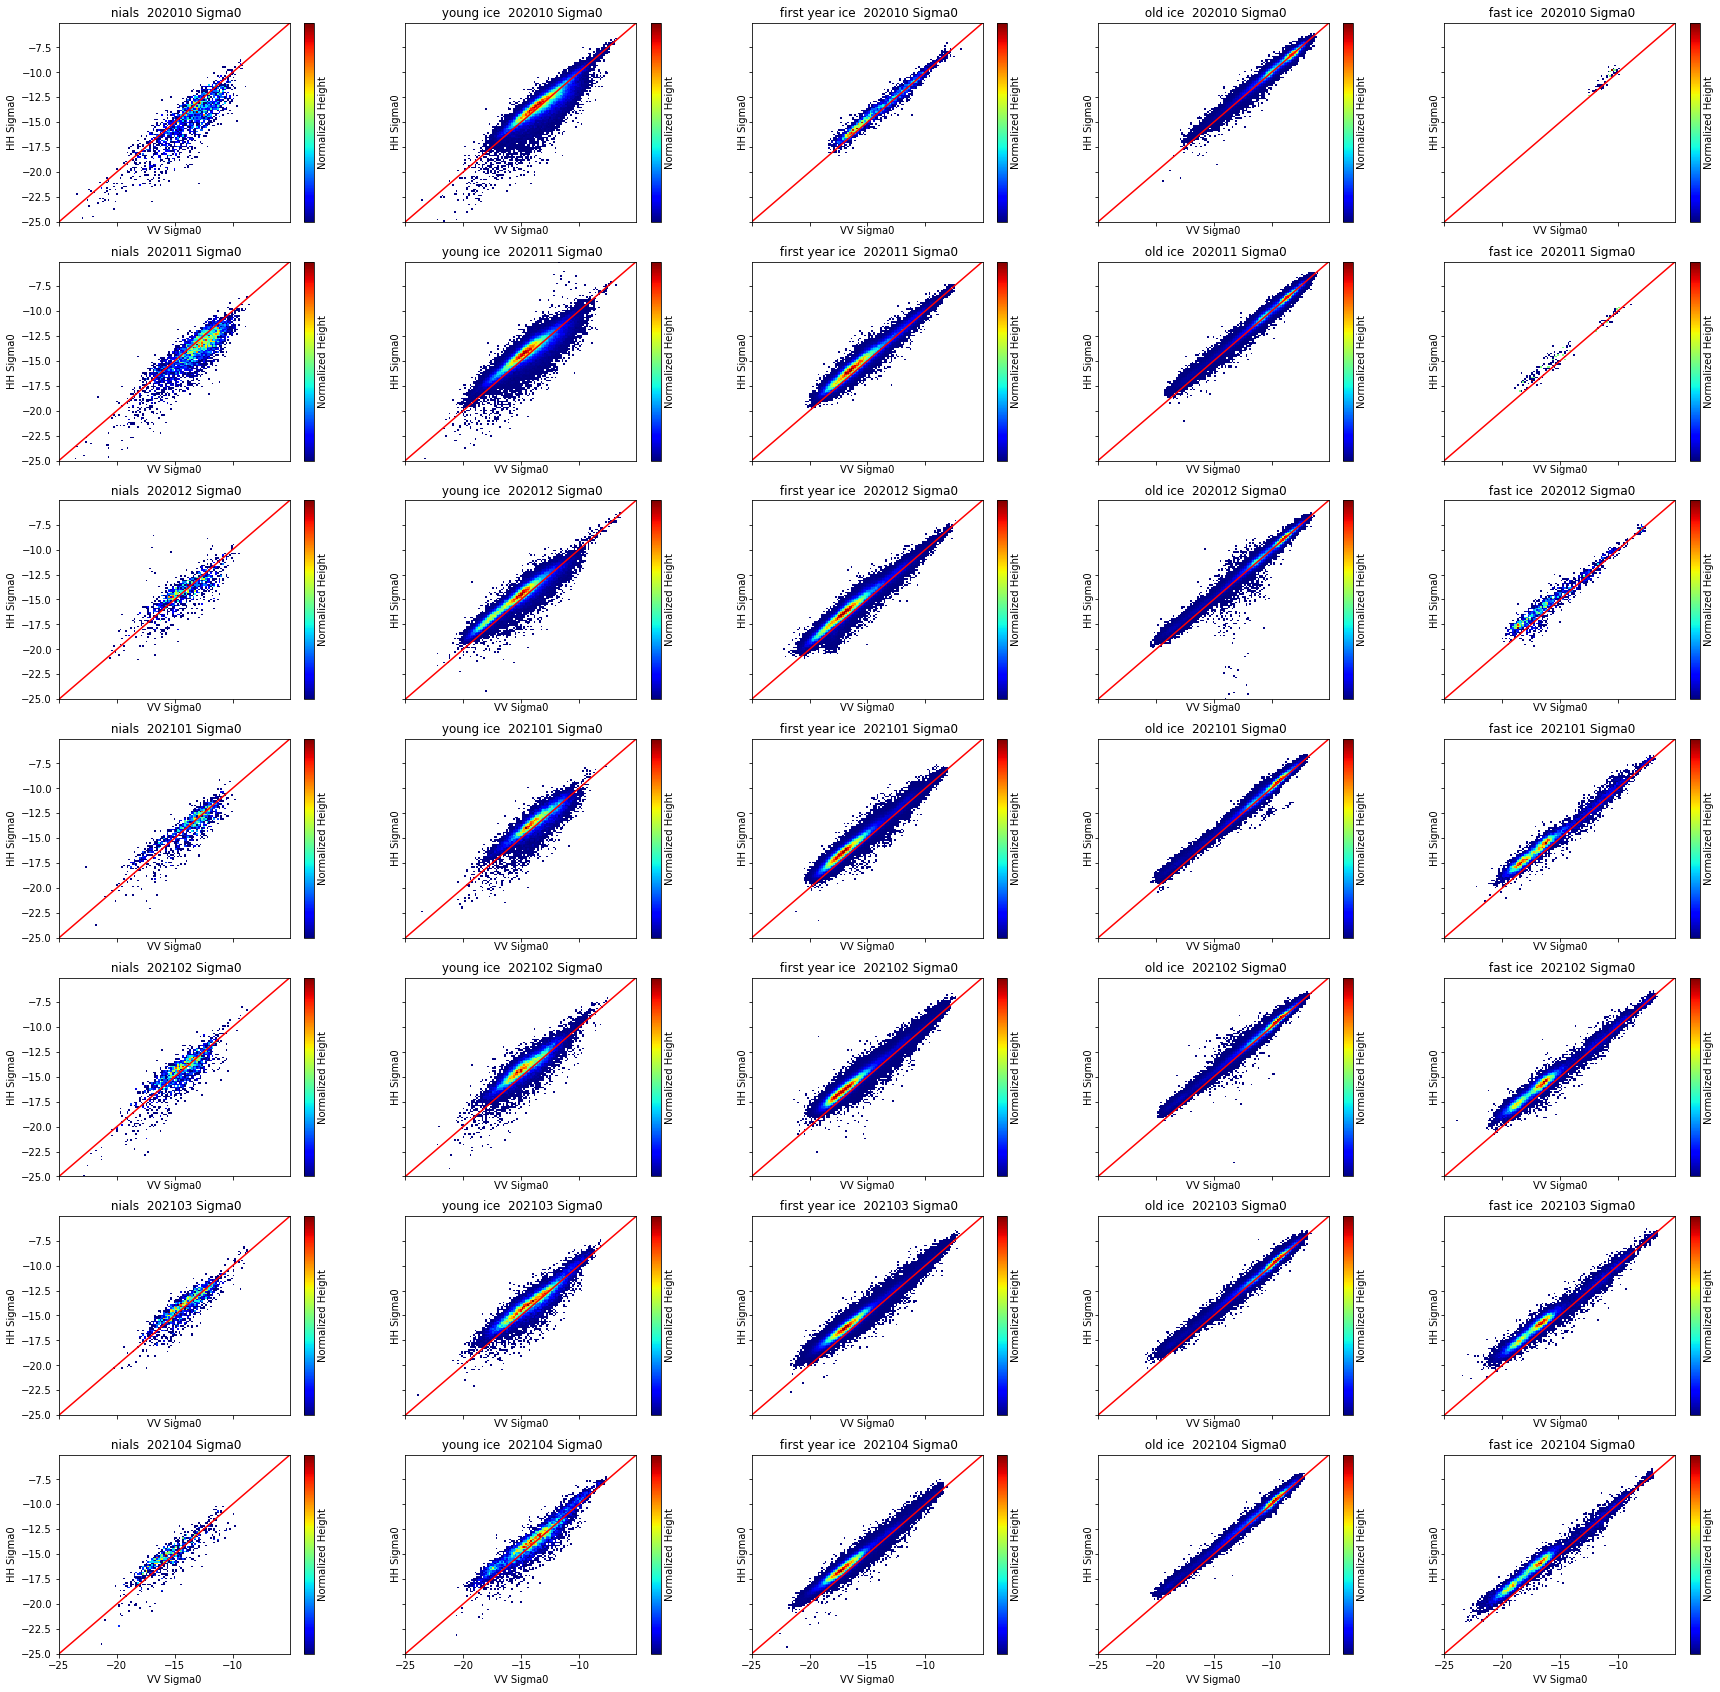

In [178]:
norm = matplotlib.colors.Normalize(vmin=0.0001, vmax=0.0005)

# fig = plt.figure()
x = np.linspace(-25,-5,100)
y=x
fig, ax = plt.subplots(7, 5, sharex='col', sharey='row',figsize=(30,30))
i=1
for j,monthly_file in enumerate(monthly_files[9:]):
    for ice_index,ice_type in enumerate(classes):
#         ax[j,ice_index].plot()
#         plt.subplot(7,5,i)
#         i+=1
        month = monthly_file[0].split('\\')[-1][:6]
        data = get_data_from_csv(monthly_file)

        data['ice_type'] = data['ice_type'].astype(str)

        data = data[data['ice_type'].isin([str(ice_index+1)]) ]
        
        
        # 画图
        hist2d,_,_,imgax = ax[j,ice_index].hist2d(x=data['sig0_VV'], y=data['sig0_HH'], bins=np.arange(-25,-5,0.15),cmin=0.00000001,density=True,cmap=plt.cm.jet)
        #cmin=0.00000001,
        cb = plt.colorbar(imgax,ax = ax[j,ice_index] ,location='right')
        tick_locator = ticker.MaxNLocator(nbins=2)
        cb.locator = tick_locator
        cb.set_ticks([0.000000001, np.nan_to_num(hist2d[0]).max()])
#         cb.set_ticklabels(['Min',  'Max'])
        cb.set_label('Normalized Height')

        ax[j,ice_index].set_xlabel('VV Sigma0')
        ax[j,ice_index].set_ylabel('HH Sigma0')
        ax[j,ice_index].set_title(f' {classes[ice_index]}  {month} Sigma0')
        # 画对角线
        ax[j,ice_index].plot(x,y,'-r')
plt.savefig(save_path + f'\\2020.png')
